In [1]:
import os
import sys
from pathlib import Path
# need to append the path to the cilia package to the sys path
sys.path.append(os.path.abspath(os.path.join(Path.cwd(), '..')))


from Cilia import ParticleTracker

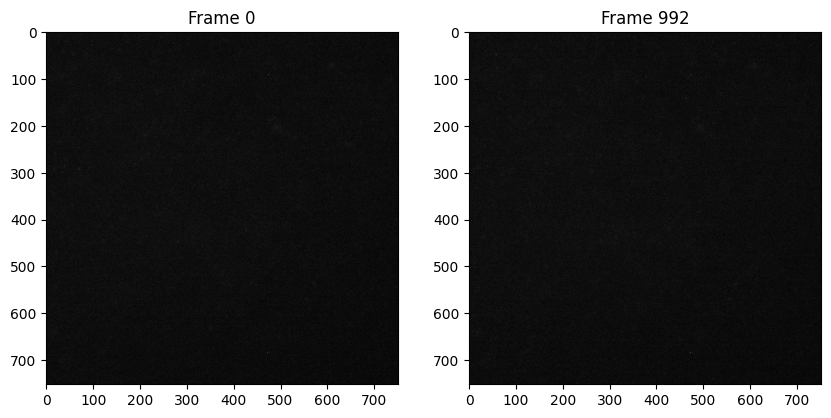

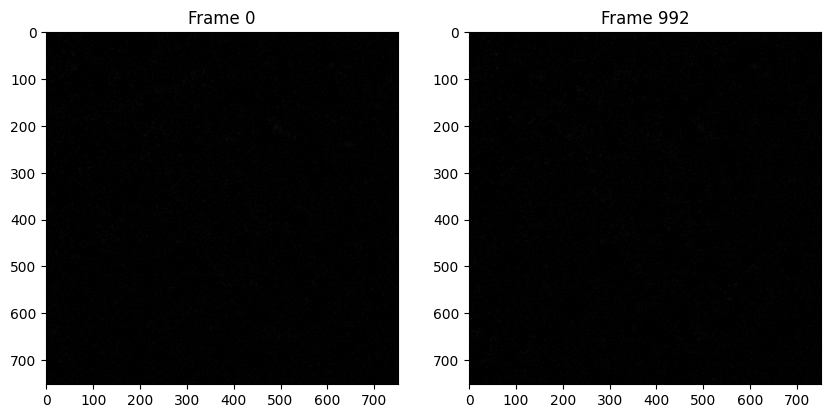

In [2]:
#FILEDIR = 'C:/Users/alana/iCloudDrive/UNIBE/Master_Thesis/Data/videos/Alan_19_11_24/'

# NAMES = ['20FPS_25dbGain_1.tiff',
#        '20FPS_25dbGain_2.tiff',
#        '20FPS_25dbGain_3.tiff',
#        '20FPS_25dbGain_4.tiff',
#        '25FPS_25dbGain_1.tiff',
#        '25FPS_25dbGain_2.tiff',
#        '25FPS_25dbGain_3.tiff',
#        '25FPS_25dbGain_4.tiff',]

FILEDIR = str(Path.cwd().parent / 'data/measurement')
NAMES = ['20FPS_25dbGain_1.tiff']

FPS = [20, 20, 20, 20, 25, 25, 25, 25]

TestTracker = ParticleTracker()
TestTracker.load(FILEDIR, NAMES[0], FPS[0]).show_frame([0,-1]).subtract_mean().show_frame([0,-1])

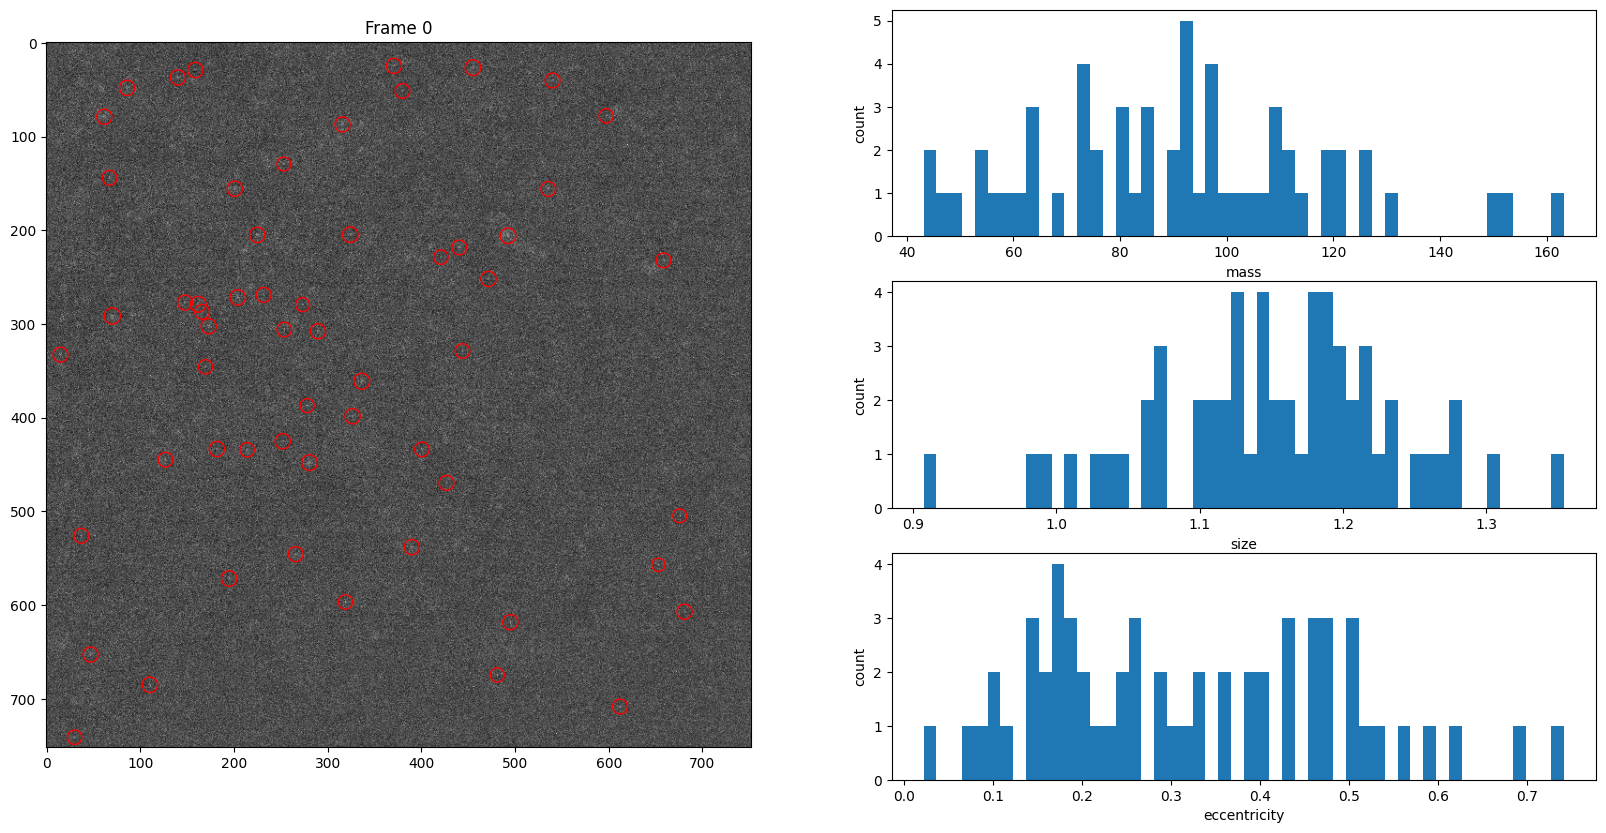

In [3]:
tp_locate_kwargs = {'diameter':5, 'minmass':20, 'maxsize':5.5}
TestTracker.locate_in_frame(0, tp_locate_kwargs, show=True)

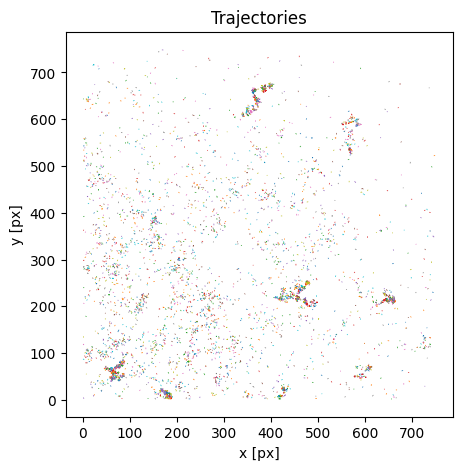

In [4]:
tp_link_kwargs = {'search_range': 2, 'memory': 5}
treshold = 1
TestTracker.assemble_tracks(tp_locate_kwargs, tp_link_kwargs, treshold, show=True)

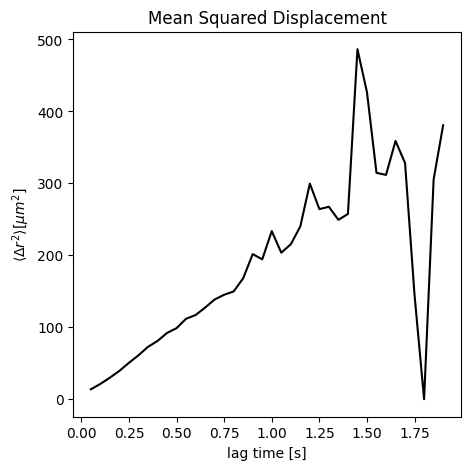

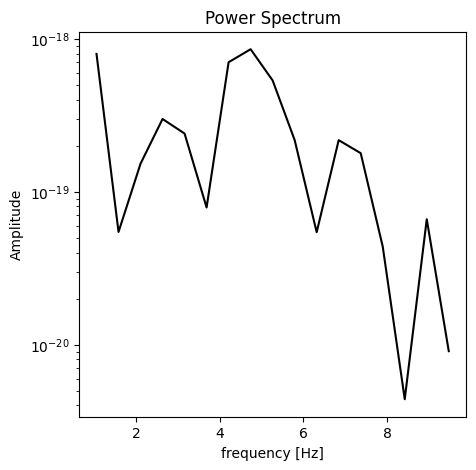

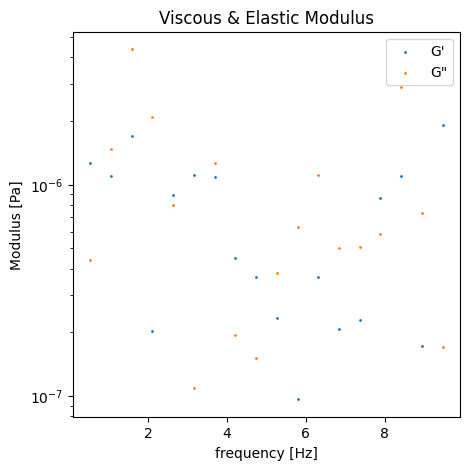

In [5]:
MICRONS_PER_PIXEL = 4
tp_emsd_kwargs = {'mpp': MICRONS_PER_PIXEL, 'max_lagtime': len(TestTracker)}
TestTracker.calculate_msd(tp_emsd_kwargs=tp_emsd_kwargs, show=True).unilateral_fourier(show=True).calculate_moduli(temperature=295, radius=500e-9, show=True)